In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# data = "https://www.kaggle.com/datasets/ashydv/housing-dataset"
data = "https://archive.ics.uci.edu/static/public/2/adult.zip"

In [4]:
# !wget $data

In [4]:
columns=('age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income')

In [5]:
df_full_train = pd.read_csv("./data/adult.data", names=columns)
df_test = pd.read_csv("./data/adult.test", names=columns, skiprows=1)

In [6]:
df_full_train.shape, df_test.shape

((32561, 15), (16281, 15))

In [8]:
32561 + 16281

48842

In [9]:
df_full_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df_full_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [11]:
df_full_train.columns = df_full_train.columns.str.lower().str.replace('-', '_')

In [12]:
df_test.columns = df_test.columns.str.lower().str.replace('-', '_')

In [13]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [14]:
categorical_columns = list(df_full_train.dtypes[df_full_train.dtypes == 'object'].index)

In [15]:
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [16]:
numerical_columns = list(df_full_train.dtypes[df_full_train.dtypes != 'object'].index)

In [17]:
numerical_columns

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [18]:
for col in categorical_columns:
    df_full_train[col] = df_full_train[col].str.lower().str.strip().str.replace('-', '_')
    df_test[col] = df_test[col].str.lower().str.strip().str.replace('-', '_')

In [19]:
df_full_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,state_gov,77516,bachelors,13,never_married,adm_clerical,not_in_family,white,male,2174,0,40,united_states,<=50k
1,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,<=50k
2,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,<=50k
3,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,<=50k
4,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,<=50k


In [20]:
df_full_train['workclass'].unique()

array(['state_gov', 'self_emp_not_inc', 'private', 'federal_gov',
       'local_gov', '?', 'self_emp_inc', 'without_pay', 'never_worked'],
      dtype=object)

In [21]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,private,226802,11th,7,never_married,machine_op_inspct,own_child,black,male,0,0,40,united_states,<=50k.
1,38,private,89814,hs_grad,9,married_civ_spouse,farming_fishing,husband,white,male,0,0,50,united_states,<=50k.
2,28,local_gov,336951,assoc_acdm,12,married_civ_spouse,protective_serv,husband,white,male,0,0,40,united_states,>50k.
3,44,private,160323,some_college,10,married_civ_spouse,machine_op_inspct,husband,black,male,7688,0,40,united_states,>50k.
4,18,?,103497,some_college,10,never_married,?,own_child,white,female,0,0,30,united_states,<=50k.


In [22]:
for col in df_full_train.columns:
    print(col)
    print(df_full_train[col].unique()[:5])
    print()

age
[39 50 38 53 28]

workclass
['state_gov' 'self_emp_not_inc' 'private' 'federal_gov' 'local_gov']

fnlwgt
[ 77516  83311 215646 234721 338409]

education
['bachelors' 'hs_grad' '11th' 'masters' '9th']

education_num
[13  9  7 14  5]

marital_status
['never_married' 'married_civ_spouse' 'divorced' 'married_spouse_absent'
 'separated']

occupation
['adm_clerical' 'exec_managerial' 'handlers_cleaners' 'prof_specialty'
 'other_service']

relationship
['not_in_family' 'husband' 'wife' 'own_child' 'unmarried']

race
['white' 'black' 'asian_pac_islander' 'amer_indian_eskimo' 'other']

sex
['male' 'female']

capital_gain
[ 2174     0 14084  5178  5013]

capital_loss
[   0 2042 1408 1902 1573]

hours_per_week
[40 13 16 45 50]

native_country
['united_states' 'cuba' 'jamaica' 'india' '?']

income
['<=50k' '>50k']



<Axes: xlabel='income', ylabel='Count'>

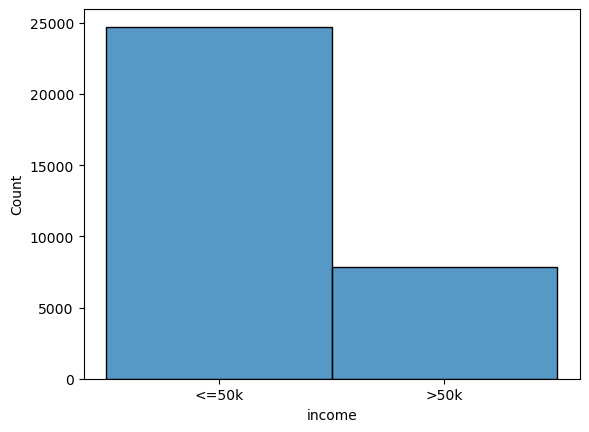

In [23]:
sns.histplot(df_full_train['income'])

In [24]:
df_full_train['income>50k'] = (df_full_train['income'] == '>50k').astype(int)
df_test['income>50k'] = (df_test['income'] == '>50k.').astype(int)

In [25]:
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income>50k
0,25,private,226802,11th,7,never_married,machine_op_inspct,own_child,black,male,0,0,40,united_states,<=50k.,0
1,38,private,89814,hs_grad,9,married_civ_spouse,farming_fishing,husband,white,male,0,0,50,united_states,<=50k.,0
2,28,local_gov,336951,assoc_acdm,12,married_civ_spouse,protective_serv,husband,white,male,0,0,40,united_states,>50k.,1
3,44,private,160323,some_college,10,married_civ_spouse,machine_op_inspct,husband,black,male,7688,0,40,united_states,>50k.,1
4,18,?,103497,some_college,10,never_married,?,own_child,white,female,0,0,30,united_states,<=50k.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,private,215419,bachelors,13,divorced,prof_specialty,not_in_family,white,female,0,0,36,united_states,<=50k.,0
16277,64,?,321403,hs_grad,9,widowed,?,other_relative,black,male,0,0,40,united_states,<=50k.,0
16278,38,private,374983,bachelors,13,married_civ_spouse,prof_specialty,husband,white,male,0,0,50,united_states,<=50k.,0
16279,44,private,83891,bachelors,13,divorced,adm_clerical,own_child,asian_pac_islander,male,5455,0,40,united_states,<=50k.,0


In [26]:
df_full_train = df_full_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)

In [27]:
df_full_train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
income>50k           0
dtype: int64

In [28]:
df_full_train = df_full_train.dropna()
df_test = df_test.dropna()

In [29]:
df_full_train.shape[0], df_test.shape[0]

(30162, 15060)

In [30]:
30162 + 15060

45222

### Setting up validation framework

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=11)

In [33]:
df_train.shape[0], df_val.shape[0], df_test.shape[0]

(24129, 6033, 15060)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [35]:
df_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income>50k
0,59,private,252714,hs_grad,9,married_civ_spouse,machine_op_inspct,husband,white,male,0,0,30,italy,<=50k,0
1,40,private,308027,hs_grad,9,widowed,other_service,unmarried,black,female,0,0,40,united_states,<=50k,0
2,36,private,186110,some_college,10,married_civ_spouse,transport_moving,husband,white,male,0,0,40,united_states,<=50k,0
3,31,private,117963,hs_grad,9,never_married,handlers_cleaners,not_in_family,white,male,0,0,60,united_states,<=50k,0
4,38,private,165930,hs_grad,9,married_civ_spouse,craft_repair,husband,white,male,0,0,40,united_states,<=50k,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24124,52,private,117700,hs_grad,9,divorced,adm_clerical,not_in_family,white,female,0,0,40,united_states,<=50k,0
24125,49,state_gov,122177,some_college,10,married_civ_spouse,machine_op_inspct,husband,white,male,0,0,40,united_states,>50k,1
24126,43,self_emp_not_inc,75435,hs_grad,9,divorced,craft_repair,unmarried,amer_indian_eskimo,male,0,0,30,united_states,<=50k,0
24127,65,private,361721,assoc_voc,11,married_civ_spouse,transport_moving,husband,white,male,0,0,20,united_states,<=50k,0


In [36]:
y_train = df_train['income>50k']
y_val = df_val['income>50k']
y_test = df_test['income>50k']

In [37]:
del df_train['income']
del df_val['income']
del df_test['income']

del df_train['income>50k']
del df_val['income>50k']
del df_test['income>50k']

del df_train['fnlwgt']
del df_val['fnlwgt']
del df_test['fnlwgt']

### Exploratory data analysis

In [38]:
# Checking the default high income rate in our dataset
df_full_train['income>50k'].value_counts(normalize=True)

0    0.751078
1    0.248922
Name: income>50k, dtype: float64

In [39]:
global_high_income_rate = df_full_train['income>50k'].mean()
global_high_income_rate

0.24892248524633645

In [40]:
df_train.dtypes[df_train.dtypes == 'object'].index

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [41]:
df_train.dtypes[df_train.dtypes != 'object'].index

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [42]:
categorical = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

In [43]:
numerical = ['age', 'capital_gain', 'capital_loss','hours_per_week']

In [44]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [45]:
numerical

['age', 'capital_gain', 'capital_loss', 'hours_per_week']

In [46]:
df_full_train['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2])

In [47]:
df_full_train['education'].unique()

array(['bachelors', 'hs_grad', '11th', 'masters', '9th', 'some_college',
       'assoc_acdm', '7th_8th', 'doctorate', 'assoc_voc', 'prof_school',
       '5th_6th', '10th', 'preschool', '12th', '1st_4th'], dtype=object)

In [48]:
len(df_full_train['education_num'].unique())

16

In [49]:
len(df_full_train['education'].unique())

16

In [50]:
df_full_train[categorical].nunique()

workclass          7
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [51]:
df_full_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income>50k
0,39,state_gov,77516,bachelors,13,never_married,adm_clerical,not_in_family,white,male,2174,0,40,united_states,<=50k,0
1,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,<=50k,0
2,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,<=50k,0
3,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,<=50k,0
4,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,<=50k,0


In [52]:
df_full_train.workclass.unique()

array(['state_gov', 'self_emp_not_inc', 'private', 'federal_gov',
       'local_gov', 'self_emp_inc', 'without_pay'], dtype=object)

In [53]:
df_full_train[df_full_train['workclass'] == 'federal_gov']['income>50k'].mean()

0.3870625662778367

In [54]:
df_full_train[df_full_train['workclass'] == 'state_gov']['income>50k'].mean()

0.2689601250977326

In [55]:
df_full_train[df_full_train['workclass'] == 'local_gov']['income>50k'].mean()

0.2946298984034833

In [56]:
df_full_train.education.unique()

array(['bachelors', 'hs_grad', '11th', 'masters', '9th', 'some_college',
       'assoc_acdm', '7th_8th', 'doctorate', 'assoc_voc', 'prof_school',
       '5th_6th', '10th', 'preschool', '12th', '1st_4th'], dtype=object)

In [57]:
df_full_train[df_full_train['education'] == 'doctorate']['income>50k'].mean()

0.7466666666666667

In [58]:
from IPython.display import display

In [59]:
for c in categorical:
    df_group = df_full_train.groupby(c)['income>50k'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_high_income_rate
    df_group['risk'] = df_group['mean'] / global_high_income_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
workclass,,,,
federal_gov,0.387063,943,0.138140,1.554952
local_gov,0.294630,2067,0.045707,1.183621
private,0.218792,22286,-0.030130,0.878957
self_emp_inc,0.558659,1074,0.309737,2.244310
self_emp_not_inc,0.285714,2499,0.036792,1.147804
state_gov,0.268960,1279,0.020038,1.080498
without_pay,0.000000,14,-0.248922,0.000000


,mean,count,diff,risk
education,,,,
10th,0.071951,820,-0.176971,0.289051
11th,0.056298,1048,-0.192625,0.226166
12th,0.076923,377,-0.171999,0.309024
1st_4th,0.039735,151,-0.209187,0.159628
5th_6th,0.041667,288,-0.207256,0.167388
7th_8th,0.062837,557,-0.186086,0.252435
9th,0.054945,455,-0.193977,0.220732
assoc_acdm,0.253968,1008,0.005046,1.020270
assoc_voc,0.263198,1307,0.014276,1.057350


,mean,count,diff,risk
marital_status,,,,
divorced,0.107262,4214,-0.141661,0.430903
married_af_spouse,0.476190,21,0.227268,1.913007
married_civ_spouse,0.454959,14065,0.206037,1.827714
married_spouse_absent,0.083784,370,-0.165139,0.336586
never_married,0.048324,9726,-0.200598,0.194133
separated,0.070288,939,-0.178635,0.282367
widowed,0.096735,827,-0.152187,0.388616


,mean,count,diff,risk
occupation,,,,
adm_clerical,0.133835,3721,-0.115087,0.537657
armed_forces,0.111111,9,-0.137811,0.446368
craft_repair,0.225310,4030,-0.023612,0.905142
exec_managerial,0.485220,3992,0.236298,1.949283
farming_fishing,0.116279,989,-0.132643,0.467130
handlers_cleaners,0.061481,1350,-0.187441,0.246990
machine_op_inspct,0.124619,1966,-0.124304,0.500632
other_service,0.041096,3212,-0.207827,0.165095
priv_house_serv,0.006993,143,-0.241929,0.028093


,mean,count,diff,risk
relationship,,,,
husband,0.455669,12463,0.206746,1.830565
not_in_family,0.106523,7726,-0.142399,0.427938
other_relative,0.039370,889,-0.209552,0.158162
own_child,0.014330,4466,-0.234592,0.057570
unmarried,0.066314,3212,-0.182609,0.266404
wife,0.493599,1406,0.244676,1.982942


,mean,count,diff,risk
race,,,,
amer_indian_eskimo,0.118881,286,-0.130041,0.477583
asian_pac_islander,0.277095,895,0.028172,1.113178
black,0.129925,2817,-0.118997,0.521951
other,0.090909,231,-0.158013,0.365210
white,0.263718,25933,0.014796,1.059438


,mean,count,diff,risk
sex,,,,
female,0.113678,9782,-0.135244,0.456681
male,0.313837,20380,0.064915,1.260782


,mean,count,diff,risk
native_country,,,,
cambodia,0.388889,18,0.139966,1.562289
canada,0.336449,107,0.087526,1.351620
china,0.294118,68,0.045195,1.181563
columbia,0.035714,56,-0.213208,0.143476
cuba,0.271739,92,0.022817,1.091662
dominican_republic,0.029851,67,-0.219072,0.119920
ecuador,0.148148,27,-0.100774,0.595158
el_salvador,0.090000,100,-0.158922,0.361558
england,0.348837,86,0.099915,1.401389


### Feature importance : Mutual information

In [60]:
from sklearn.metrics import mutual_info_score

In [61]:
mutual_info_score(df_full_train.age, df_full_train['income>50k'])

0.0675671582497318

In [62]:
mutual_info_score(df_full_train['race'], df_full_train['income>50k'])

0.0057490412634228485

In [63]:
def mutual_info_highincome_score(series):
    return mutual_info_score(series, df_full_train['income>50k'])

In [64]:
mi = df_full_train[categorical].apply(mutual_info_highincome_score)
mi.sort_values(ascending=False)

relationship      0.115186
marital_status    0.109150
education         0.064736
occupation        0.064597
sex               0.025928
workclass         0.011856
native_country    0.006466
race              0.005749
dtype: float64

### Feature importance : Correlation

In [65]:
df_full_train[numerical].corrwith(df_full_train['income>50k']).sort_values(ascending=False)

age               0.241998
hours_per_week    0.229480
capital_gain      0.221196
capital_loss      0.150053
dtype: float64

#### One hot encoding

In [66]:
from sklearn.feature_extraction import DictVectorizer

In [67]:
# df_full_train['age']

In [68]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts

[{'workclass': 'private',
  'education': 'hs_grad',
  'marital_status': 'married_civ_spouse',
  'occupation': 'machine_op_inspct',
  'relationship': 'husband',
  'race': 'white',
  'sex': 'male',
  'native_country': 'italy',
  'age': 59,
  'capital_gain': 0,
  'capital_loss': 0,
  'hours_per_week': 30},
 {'workclass': 'private',
  'education': 'hs_grad',
  'marital_status': 'widowed',
  'occupation': 'other_service',
  'relationship': 'unmarried',
  'race': 'black',
  'sex': 'female',
  'native_country': 'united_states',
  'age': 40,
  'capital_gain': 0,
  'capital_loss': 0,
  'hours_per_week': 40},
 {'workclass': 'private',
  'education': 'some_college',
  'marital_status': 'married_civ_spouse',
  'occupation': 'transport_moving',
  'relationship': 'husband',
  'race': 'white',
  'sex': 'male',
  'native_country': 'united_states',
  'age': 36,
  'capital_gain': 0,
  'capital_loss': 0,
  'hours_per_week': 40},
 {'workclass': 'private',
  'education': 'hs_grad',
  'marital_status': 'nev

In [69]:
dv = DictVectorizer(sparse=False)

In [70]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [71]:
dv.get_feature_names_out()

array(['age', 'capital_gain', 'capital_loss', 'education=10th',
       'education=11th', 'education=12th', 'education=1st_4th',
       'education=5th_6th', 'education=7th_8th', 'education=9th',
       'education=assoc_acdm', 'education=assoc_voc',
       'education=bachelors', 'education=doctorate', 'education=hs_grad',
       'education=masters', 'education=preschool',
       'education=prof_school', 'education=some_college',
       'hours_per_week', 'marital_status=divorced',
       'marital_status=married_af_spouse',
       'marital_status=married_civ_spouse',
       'marital_status=married_spouse_absent',
       'marital_status=never_married', 'marital_status=separated',
       'marital_status=widowed', 'native_country=cambodia',
       'native_country=canada', 'native_country=china',
       'native_country=columbia', 'native_country=cuba',
       'native_country=dominican_republic', 'native_country=ecuador',
       'native_country=el_salvador', 'native_country=england',
       'na

In [72]:
X_train = dv.transform(train_dicts)

In [73]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [74]:
X_val = dv.transform(val_dicts)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
model.intercept_[0]

-1.3223487064017911

In [78]:
model.coef_[0].round(3)

array([ 7.000e-03,  0.000e+00,  1.000e-03, -3.840e-01, -4.700e-01,
       -1.350e-01, -1.190e-01, -2.320e-01, -4.250e-01, -2.690e-01,
       -7.300e-02, -9.400e-02,  6.070e-01,  3.370e-01, -7.390e-01,
        6.410e-01, -3.600e-02,  3.860e-01, -3.150e-01,  1.400e-02,
       -4.380e-01,  1.400e-02,  1.027e+00, -9.400e-02, -1.490e+00,
       -2.140e-01, -1.250e-01,  1.000e-03,  2.000e-03, -3.500e-02,
       -4.000e-02, -9.000e-03, -4.200e-02, -1.600e-02, -5.600e-02,
        2.000e-03,  1.000e-02,  1.000e-02, -2.100e-02, -3.100e-02,
       -1.600e-02, -1.000e-03, -4.000e-03, -4.000e-03, -1.000e-03,
       -3.700e-02, -4.000e-03, -1.000e-03, -7.000e-03, -2.900e-02,
       -1.100e-02, -1.000e-02, -4.140e-01, -2.200e-02, -7.000e-03,
       -1.400e-02, -1.900e-02, -8.000e-03, -2.400e-02, -5.800e-02,
       -3.000e-03, -4.200e-02,  2.000e-03, -5.000e-03, -9.000e-03,
       -3.070e-01, -4.000e-02, -1.000e-03, -2.630e-01, -5.000e-03,
       -3.440e-01,  9.270e-01, -5.940e-01, -4.870e-01, -4.850e

In [79]:
model.predict(X_val)

array([1, 0, 0, ..., 0, 0, 0])

In [80]:
model.predict_proba(X_val)

array([[0.31535831, 0.68464169],
       [0.97463707, 0.02536293],
       [0.99809419, 0.00190581],
       ...,
       [0.9300655 , 0.0699345 ],
       [0.99547275, 0.00452725],
       [0.61941297, 0.38058703]])

In [81]:
y_pred = model.predict_proba(X_val)[:, 1]

In [82]:
y_pred >= 0.5

array([ True, False, False, ..., False, False, False])

In [83]:
(y_pred >= 0.5).astype(int)

array([1, 0, 0, ..., 0, 0, 0])

In [84]:
df_val[y_pred >= 0.5]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,55,private,doctorate,16,married_civ_spouse,prof_specialty,husband,white,male,0,0,40,united_states
3,71,self_emp_inc,masters,14,married_civ_spouse,exec_managerial,husband,white,male,99999,0,40,united_states
8,34,self_emp_not_inc,bachelors,13,married_civ_spouse,prof_specialty,husband,black,male,0,1887,48,united_states
10,64,federal_gov,doctorate,16,married_civ_spouse,prof_specialty,husband,asian_pac_islander,male,0,0,40,china
11,36,private,some_college,10,married_civ_spouse,exec_managerial,husband,white,male,0,0,50,united_states
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,43,private,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,7298,0,40,united_states
5999,39,private,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,45,united_states
6012,45,self_emp_inc,hs_grad,9,married_civ_spouse,exec_managerial,husband,white,male,0,0,48,united_states
6027,49,private,masters,14,married_civ_spouse,prof_specialty,husband,white,male,0,0,50,united_states


In [85]:
#accuracy
(y_val == (y_pred >= 0.5).astype(int)).mean()

0.8446875517984419

In [86]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('age', 0.007),
 ('capital_gain', 0.0),
 ('capital_loss', 0.001),
 ('education=10th', -0.384),
 ('education=11th', -0.47),
 ('education=12th', -0.135),
 ('education=1st_4th', -0.119),
 ('education=5th_6th', -0.232),
 ('education=7th_8th', -0.425),
 ('education=9th', -0.269),
 ('education=assoc_acdm', -0.073),
 ('education=assoc_voc', -0.094),
 ('education=bachelors', 0.607),
 ('education=doctorate', 0.337),
 ('education=hs_grad', -0.739),
 ('education=masters', 0.641),
 ('education=preschool', -0.036),
 ('education=prof_school', 0.386),
 ('education=some_college', -0.315),
 ('hours_per_week', 0.014),
 ('marital_status=divorced', -0.438),
 ('marital_status=married_af_spouse', 0.014),
 ('marital_status=married_civ_spouse', 1.027),
 ('marital_status=married_spouse_absent', -0.094),
 ('marital_status=never_married', -1.49),
 ('marital_status=separated', -0.214),
 ('marital_status=widowed', -0.125),
 ('native_country=cambodia', 0.001),
 ('native_country=canada', 0.002),
 ('native_country=c

In [87]:
def tpr_fpr_dataframe(y_test, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_test == 1)
        actual_negative = (y_test == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)\
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [88]:
df_scores = tpr_fpr_dataframe(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,1509,4524,0,0,1.000000,1.000000
10,0.1,1417,1714,92,2810,0.939032,0.378868
20,0.2,1260,1093,249,3431,0.834990,0.241600
30,0.3,1095,639,414,3885,0.725646,0.141247
40,0.4,1002,465,507,4059,0.664016,0.102785
50,0.5,915,343,594,4181,0.606362,0.075818
60,0.6,773,224,736,4300,0.512260,0.049514
70,0.7,645,132,864,4392,0.427435,0.029178
80,0.8,419,49,1090,4475,0.277667,0.010831
90,0.9,298,17,1211,4507,0.197482,0.003758


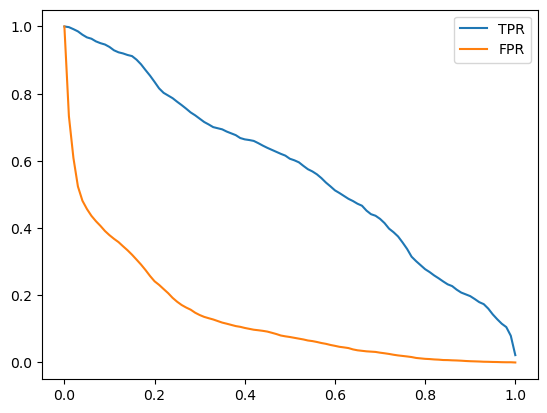

In [89]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

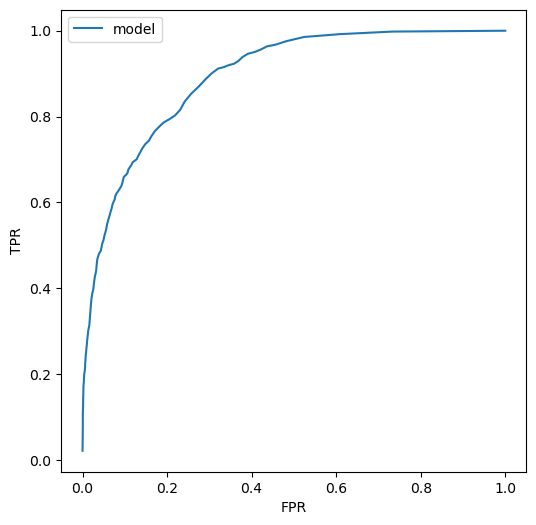

In [90]:
plt.figure(figsize=(6,6))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [91]:
from sklearn.metrics import roc_curve, auc

In [92]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

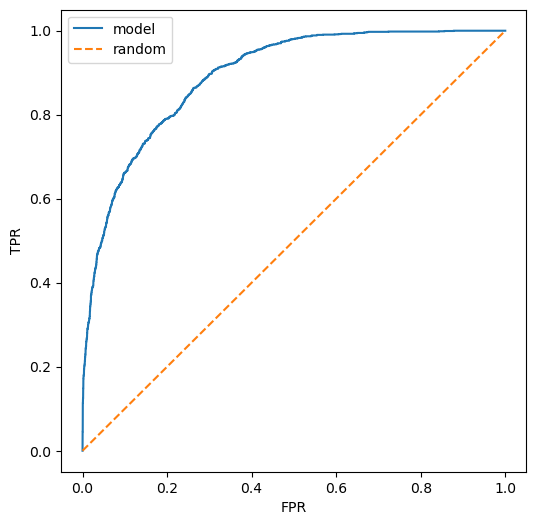

In [93]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [94]:
auc(fpr, tpr)

0.8929631758520495

### Trying a smaller model

In [95]:
small = ['education', 'sex', 'workclass', 'race']

In [96]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [97]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [98]:
dv_small.get_feature_names_out()

array(['education=10th', 'education=11th', 'education=12th',
       'education=1st_4th', 'education=5th_6th', 'education=7th_8th',
       'education=9th', 'education=assoc_acdm', 'education=assoc_voc',
       'education=bachelors', 'education=doctorate', 'education=hs_grad',
       'education=masters', 'education=preschool',
       'education=prof_school', 'education=some_college',
       'race=amer_indian_eskimo', 'race=asian_pac_islander', 'race=black',
       'race=other', 'race=white', 'sex=female', 'sex=male',
       'workclass=federal_gov', 'workclass=local_gov',
       'workclass=private', 'workclass=self_emp_inc',
       'workclass=self_emp_not_inc', 'workclass=state_gov',
       'workclass=without_pay'], dtype=object)

In [99]:
X_train_small = dv_small.transform(dicts_train_small)
X_val_small = dv_small.transform(dicts_val_small)

In [100]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
model_small.intercept_[0]

-2.2263234960392255

In [102]:
model_small.coef_[0]

array([-0.96614507, -1.31693192, -0.67739197, -1.47791454, -1.48221137,
       -1.18034379, -1.19950249,  0.52498282,  0.5837813 ,  1.26543414,
        2.72379779, -0.06851729,  1.89950697, -1.56989793,  2.50153556,
        0.26590157, -0.30383028,  0.15798091, -0.02071926, -0.49121529,
        0.48386769, -0.74609706,  0.57218082,  0.55980407,  0.04601111,
       -0.09620932,  0.92448342, -0.11135073, -0.37581163, -1.12084316])

In [103]:
y_pred_small = model_small.predict_proba(X_val_small)[:,1]
y_pred_small >= 0.5

array([ True, False, False, ..., False, False, False])

In [104]:
tpr_fpr_dataframe(y_val, (y_pred_small >= 0.5).astype(int))

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,1509,4524,0,0,1.000000,1.000000
1,0.01,386,194,1123,4330,0.255799,0.042882
2,0.02,386,194,1123,4330,0.255799,0.042882
3,0.03,386,194,1123,4330,0.255799,0.042882
4,0.04,386,194,1123,4330,0.255799,0.042882
...,...,...,...,...,...,...,...
96,0.96,386,194,1123,4330,0.255799,0.042882
97,0.97,386,194,1123,4330,0.255799,0.042882
98,0.98,386,194,1123,4330,0.255799,0.042882
99,0.99,386,194,1123,4330,0.255799,0.042882


In [105]:
fpr, tpr, thresholds = roc_curve(y_val, (y_pred_small >= 0.5).astype(int))

In [106]:
auc(fpr, tpr)

0.6064580685647388

### Using the model

In [107]:
dicts_full_train = df_full_train[numerical + categorical].to_dict(orient='records')

In [108]:
dv = DictVectorizer(sparse=False)

In [109]:
X_full_train = dv.fit_transform(dicts_full_train)

In [110]:
y_full_train = df_full_train['income>50k'].values

In [111]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [112]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [113]:
X_test = dv.transform(dicts_test)

In [114]:
y_pred = model.predict_proba(X_test)[:, 1]

In [115]:
high_income_decision = (y_pred >= 0.5)

In [116]:
(y_test == high_income_decision).mean().sum()

0.8357901726427622

In [117]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    high_income_decision = (y_pred >= t)
    score = (y_test == high_income_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.246
0.05 0.564
0.10 0.655
0.15 0.709
0.20 0.745
0.25 0.776
0.30 0.805
0.35 0.822
0.40 0.831
0.45 0.835
0.50 0.836
0.55 0.834
0.60 0.832
0.65 0.825
0.70 0.816
0.75 0.811
0.80 0.802
0.85 0.797
0.90 0.789
0.95 0.780
1.00 0.754


In [118]:
scores

[0.2456839309428951,
 0.5644090305444888,
 0.6545152722443559,
 0.7088977423638778,
 0.7445551128818061,
 0.7758964143426295,
 0.8049800796812749,
 0.8222443559096946,
 0.8312084993359894,
 0.8352589641434263,
 0.8357901726427622,
 0.8341965471447543,
 0.8318725099601594,
 0.8252324037184595,
 0.8161354581673307,
 0.8110889774236387,
 0.802324037184595,
 0.7965471447543161,
 0.7890438247011953,
 0.7802788844621514,
 0.7543160690571049]

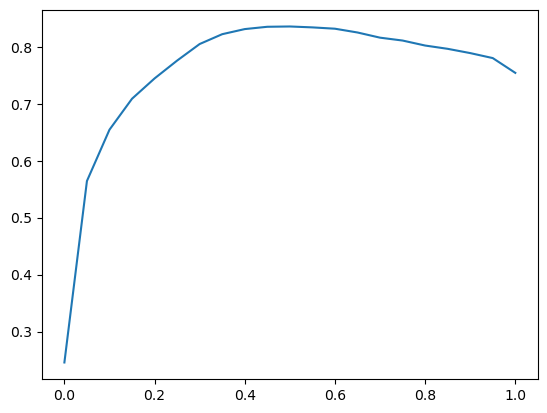

In [119]:
plt.plot(thresholds, scores)

In [120]:
actual_positive = (y_test == 1)
actual_negative = (y_test == 0)

In [121]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [122]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [123]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [124]:
 confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
 ])

In [125]:
confusion_matrix

array([[10531,   829],
       [ 1644,  2056]])

In [126]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.7 , 0.06],
       [0.11, 0.14]])

In [127]:
# Accuracy

(tp + tn) / (tp + tn + fp + fn)

0.8357901726427622

In [128]:
# precision
# Fraction of correct positive predictions 0/1 - 1 is positive

p = tp / (tp + fp)
p

0.7126516464471404

In [129]:
# Recall
# Fraction of correct positive examples (or fraction of examples we predicted correctly)

r = tp / (tp + fn) # because fn are actually positive examples just predicted negative
r

0.5556756756756757

### ROC Curves

In [130]:
tpr = tp / (tp + fn)
tpr

0.5556756756756757

In [131]:
fpr = fp / (fp + tn)
fpr

0.07297535211267606

In [132]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_test == 1)
    actual_negative = (y_test == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [133]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [134]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,3700,11360,0,0
10,0.1,3557,5060,143,6300
20,0.2,3156,3303,544,8057
30,0.3,2762,1999,938,9361
40,0.4,2436,1278,1264,10082
50,0.5,2056,829,1644,10531
60,0.6,1709,541,1991,10819
70,0.7,1212,281,2488,11079
80,0.8,806,83,2894,11277
90,0.9,541,18,3159,11342


In [135]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [136]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,3700,11360,0,0,1.000000,1.000000
10,0.1,3557,5060,143,6300,0.961351,0.445423
20,0.2,3156,3303,544,8057,0.852973,0.290757
30,0.3,2762,1999,938,9361,0.746486,0.175968
40,0.4,2436,1278,1264,10082,0.658378,0.112500
50,0.5,2056,829,1644,10531,0.555676,0.072975
60,0.6,1709,541,1991,10819,0.461892,0.047623
70,0.7,1212,281,2488,11079,0.327568,0.024736
80,0.8,806,83,2894,11277,0.217838,0.007306
90,0.9,541,18,3159,11342,0.146216,0.001585


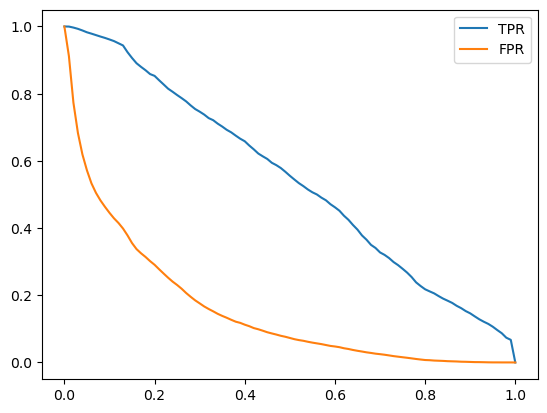

In [137]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

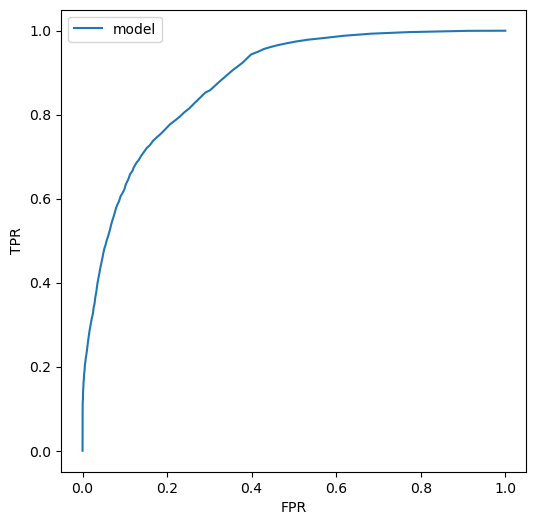

In [138]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
# plt.plot(df_random.fpr, df_random.tpr, label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [139]:
from sklearn.metrics import roc_curve

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

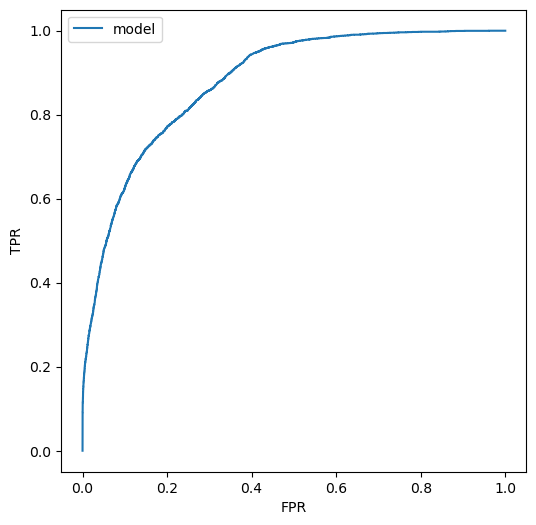

In [141]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label='model')
# plt.plot(df_random.fpr, df_random.tpr, label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [142]:
from sklearn.metrics import auc

In [143]:
auc(fpr, tpr)

0.8795216144842026

In [144]:
from sklearn.metrics import roc_auc_score, auc, roc_curve
roc_auc_score(y_test, y_pred)

0.8795216144842026

### Cross Validation

In [145]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [146]:
dv, model = train(df_train, y_train, C=0.001)

In [147]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X=dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [148]:
y_pred = predict(df_val, dv, model)

In [149]:
from sklearn.model_selection import KFold

In [150]:
Kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [151]:
Kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x7f0c4c51c190>

In [152]:
from tqdm.auto import tqdm

In [153]:
n_splits = 3

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10 ]):
    scores = []

    for train_idx, test_idx in Kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[test_idx]

        y_train = df_train['income>50k'].values
        y_val = df_val['income>50k'].values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.881 +- 0.003


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=0.01 0.899 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=0.1 0.903 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=0.5 0.903 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=1 0.903 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=5 0.903 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C=10 0.903 +- 0.005


/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
dv, model = train(df_full_train, df_full_train['income>50k'].values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

/home/singh/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9015467857822611

#### Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
for d in [1, 2, 3, 4, 5, 7, 10, 11, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)

    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]

    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (d, auc))

ValueError: Number of labels=27146 does not match number of samples=24129

In [ ]:
scores = []

for d in [7, 10, 11]:
    for  s in [1, 2, 10, 15, 50, 100]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)

        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))

        # print('(%4s, %3s) -> %.3f' % (d, s, auc))


: 

In [ ]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

: 

In [ ]:
df_scores.sort_values(by='auc', ascending=False)

: 

In [ ]:
df_scores_pivot = df_scores.pivot_table(index='min_samples_leaf', 
                        columns='max_depth', 
                        values=['auc'])

: 

In [ ]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

: 

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
dt.fit(X_train, y_train)

: 

### Ensembles and Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

: 

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

: 

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

: 

In [ ]:
rf.predict_proba(X_val[[0]])

: 

In [ ]:
scores = []
for n in range(20, 201, 5):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

: 

In [ ]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

: 

In [ ]:
plt.plot(df_scores.n_estimators, df_scores.auc)

: 

### Training Random Forest for different tree params

In [ ]:
scores = []

for d in [7, 10, 11]:
    for n in range(20, 151, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

: 

In [ ]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

: 

In [ ]:
for d in [7, 10, 11]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)

plt.legend()

: 

In [ ]:
max_depth = 11

: 

In [ ]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(20, 151, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

: 

In [ ]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

: 

In [ ]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
            color = col,
            label = 'min_samples_leaf=%d' % s)

plt.legend()

: 

In [ ]:
n_estimators = 50
max_depth = 11
min_samples_leaf = 3

: 

In [ ]:
rf = RandomForestClassifier(n_estimators=50,
                                    max_depth=11,
                                    min_samples_leaf=3,
                                    n_jobs=4,
                                    random_state=1)
rf.fit(X_train, y_train)

: 

In [ ]:
# !pip install xgboost

: 

In [7]:
import xgboost as xgb

In [11]:
print(xgb.__version__)

2.0.1


In [ ]:
features = dv.feature_names_
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

: 

In [ ]:
dval = xgb.DMatrix(X_val, feature_names=features)

: 

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

: 

In [ ]:
y_pred = model.predict(dval)

: 

In [ ]:
roc_auc_score(y_val, y_pred)

: 

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

: 

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 300, 
                    verbose_eval = 5,
                    evals = watchlist)

: 

In [ ]:
print(output.stdout)

: 

In [ ]:
s = output.stdout

: 

In [ ]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line =  line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns = columns)
    return df_results


: 

In [ ]:
df_score = parse_xgb_output(output)

: 

In [ ]:
# plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

: 

### Tuning XGB Params
<ul>
<li> learning rate (eta) </li>
<li> max_depth </li> 
<li>min_child_weight</li>
</ul>


In [ ]:
scores = {}

: 

In [ ]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 13,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 300, 
                    verbose_eval = 5,
                    evals = watchlist)

: 

df_score = parse_xgb_output(output)

In [ ]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

: 

In [ ]:
scores['eta=0.01']

: 

In [ ]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.05']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

: 

In [ ]:
eta = 0.1

: 

In [ ]:
mds = ['max_depth=11', 'max_depth=6', 'max_depth=10']
for md in mds:
    df_score = scores[md]
    plt.plot(df_score.num_iter, df_score.val_auc, label=md)
plt.ylim(0.9, 0.95)
plt.legend()

: 

In [ ]:
mcws = ['min_child_weight=1', 'min_child_weight=3', 'min_child_weight=13']
for mcw in mcws:
    df_score = scores[mcw]
    plt.plot(df_score.num_iter, df_score.val_auc, label=mcw)
plt.ylim(0.9, 0.95)
plt.legend()

: 

### Final XGB Model

In [ ]:
eta = 0.1
max_depth = 10
min_child_weight = 1
num_boost_round = 150

: 

In [ ]:
xgb_params = {
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                    num_boost_round = num_boost_round, 
                    verbose_eval = 5,
                    evals = watchlist)

: 

#### Selecting the final model

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
dt.fit(X_train, y_train)

: 

In [ ]:
rf = RandomForestClassifier(n_estimators=50,
                                    max_depth=11,
                                    min_samples_leaf=3,
                                    n_jobs=4,
                                    random_state=1)
rf.fit(X_train, y_train)

: 

In [ ]:
eta = 0.1
max_depth = 10
min_child_weight = 1
num_boost_round = 150

xgb_params = {
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                    num_boost_round = num_boost_round)

: 

In [ ]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

: 

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

: 

In [ ]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

: 

### Using full train data on XGBoost model

In [ ]:
df_full_train

: 

In [ ]:
y_full_train = df_full_train['income>50k'].values

: 

In [ ]:
del df_full_train['income']

del df_full_train['income>50k']

del df_full_train['fnlwgt']

: 

In [ ]:
dicts_full_train = df_full_train[numerical + categorical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

: 

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, 
                    label=y_full_train, 
                    feature_names=dv.feature_names_)

dtest = xgb.DMatrix(X_test, 
                    feature_names=dv.feature_names_)



: 

In [ ]:
eta = 0.1
max_depth = 10
min_child_weight = 1
num_boost_round = 150

xgb_params = {
    'eta': eta,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, 
                    num_boost_round = num_boost_round)

: 

In [ ]:
y_pred = model.predict(dtest)

: 

In [ ]:
y_pred[:10]

: 

In [ ]:
roc_auc_score(y_test, y_pred)

: 

: 